In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
trainData = pd.read_csv('train.csv')

In [4]:
trainData.shape

(45593, 20)

In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
trainData["Delivery_person_ID"].nunique()

1320

# Converting Time_taken(min) column to numeric int

In [7]:
trainData["Time_taken(min)"].describe()

count        45593
unique          45
top       (min) 26
freq          2123
Name: Time_taken(min), dtype: object

In [8]:
trainData["Time_taken(min)"].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [9]:
trainData["Time_taken(min)"] = trainData["Time_taken(min)"].str.extract('(\d+)')


In [10]:
trainData["Time_taken(min)"] = pd.to_numeric(trainData["Time_taken(min)"])
trainData["Time_taken(min)"].dropna()
trainData["Time_taken(min)"].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [11]:
trainData["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51], dtype=int64)

In [12]:
trainData["Time_taken(min)"].dropna()

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [13]:
trainData["Time_taken(min)"].count()

45593

# Stripping unnecessary string in Weatherconditions column

In [14]:
trainData['Weatherconditions'] = trainData['Weatherconditions'].str.replace("conditions", "")

# No data cleaning required for city column

In [15]:
print("Number of City :", len(trainData["City"].unique()))
print(trainData.groupby('City', as_index=False)['Time_taken(min)'].mean())

Number of City : 4
             City  Time_taken(min)
0  Metropolitian         27.315226
1            NaN         22.058333
2     Semi-Urban         49.731707
3          Urban         22.984017


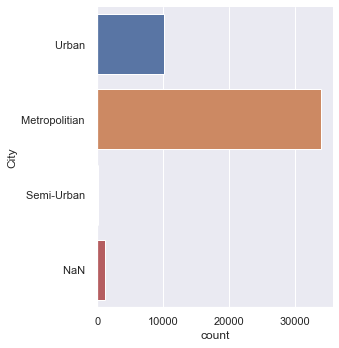

In [24]:
# Count Plot for Legendary Train
sb.catplot(y = "City", data = trainData, kind = "count")

In [26]:
print("Number of Festivals :", len(trainData["Festival"].unique()))
print(trainData.groupby('Festival', as_index=False)['Time_taken(min)'].mean())

Number of Festivals : 3
  Festival  Time_taken(min)
0     NaN         11.166667
1      No         25.984843
2     Yes         45.517857


# Will be omitting the festival column in our models, no need to clean

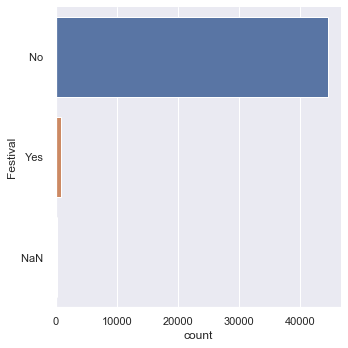

In [27]:
# Count Plot for Legendary Train
sb.catplot(y = "Festival", data = trainData, kind = "count")

In [28]:
trainData["multiple_deliveries"].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

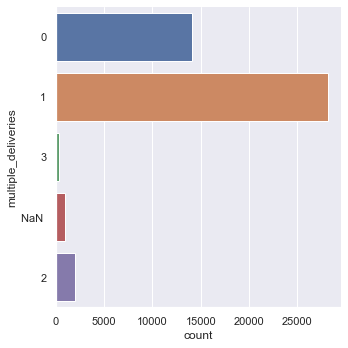

In [29]:
# Count Plot for Legendary Train
sb.catplot(y = "multiple_deliveries", data = trainData, kind = "count")

# Replacing multiple deliveries coumn with the mode (1 in this case)

In [34]:
trainData["multiple_deliveries"] = trainData["multiple_deliveries"].replace('NaN ', '1')

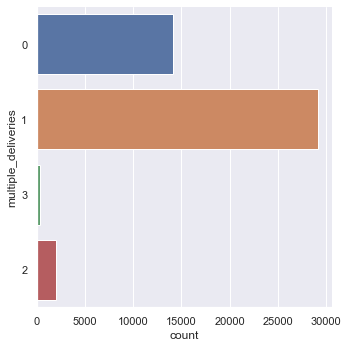

In [35]:
# Count Plot for Legendary Train
sb.catplot(y = "multiple_deliveries", data = trainData, kind = "count")